<a href="https://colab.research.google.com/github/hjn14133/Previous-Project/blob/main/Field_Test_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

DNs = np.array([583833.00, 192483.00, 431479.00, 635105, 890802.00, 
                146825.00, 434682.00 ])

coff = 32767

V = DNs/coff

cal = np.array([583.60, 152.3, 636.8, 832, 1268.8, 96.2, 547.40 ])





In [ ]:
mae = metrics.mean_absolute_error(V, cal)
mse = metrics.mean_squared_error(V, cal)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(V,cal)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 573.703537531227
MSE: 460875.8923722763
RMSE: 678.8784076491727
R-Squared: -8628.560693137846


In [ ]:
# calculate manually
d = V - cal
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2)/sum((V-np.mean(V))**2))

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)
print("R-Squared:", r2_f)
 

Results by manual calculation:
MAE: 573.703537531227
MSE: 460875.8923722763
RMSE: 678.8784076491727
R-Squared: -8628.560693137846


slope: 49.443017    intercept: -126.472712
R-squared: 0.953205
Mean absolute percentage error of sensors raw sum: 9.01


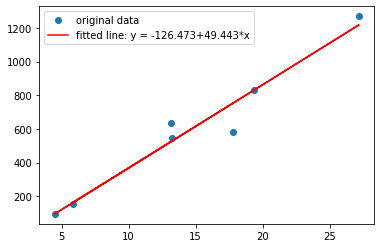

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
  
# new way to perform linear regression
slope, intercept, r_value, p_value, std_err  = stats.linregress(V, cal)
AW1_pred = intercept + slope*V
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)
print("Mean absolute percentage error of sensors raw sum: %.2f"
      % mean_absolute_percentage_error(cal, AW1_pred))

label1 ='fitted line: y = '+ str(round(intercept, 3)) +'+'+ str(round(slope, 3))+ '*x'
plt.plot(V, cal, 'o', label='original data')
plt.plot(V,  AW1_pred, 'r', label=label1)
plt.legend()


plt.show()

In [ ]:
mae = metrics.mean_absolute_error(cal, AW1_pred)
mse = metrics.mean_squared_error(cal, AW1_pred)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(cal,AW1_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 52.159683566748924
MSE: 6409.383980119711
RMSE: 80.05862839269551
R-Squared: 0.9532052137900818
